In [122]:
# Importing necessary packages
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting


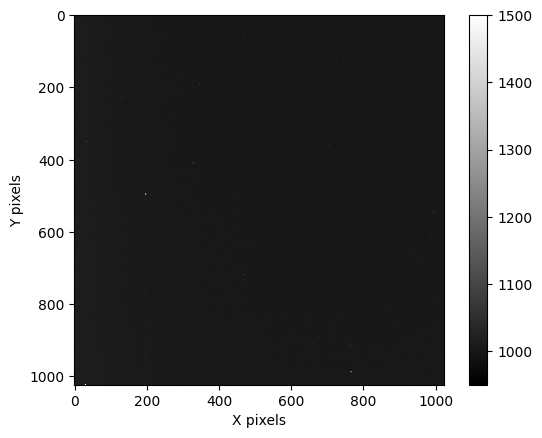

In [123]:
bias_frame=fits.open(r"../FITS_Files/3.1_bias.00000011.BIAS.FIT")
bias_frame_data=bias_frame[0].data
plt.imshow(bias_frame_data,cmap='gray',vmin=950,vmax=1500)
plt.colorbar()
plt.xlabel('X pixels')
plt.ylabel('Y pixels')
plt.show()

Text(0, 0.5, 'Counts')

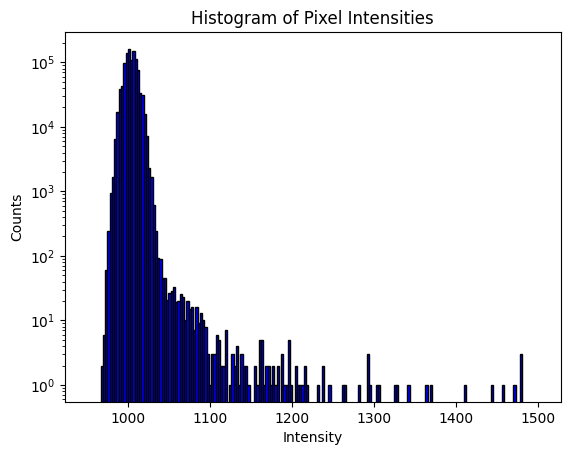

In [124]:
flattened_data=bias_frame_data.flatten()

plt.hist(flattened_data,bins=200,range=(950,1500),log=True,color='blue',edgecolor='black')
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Intensity')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

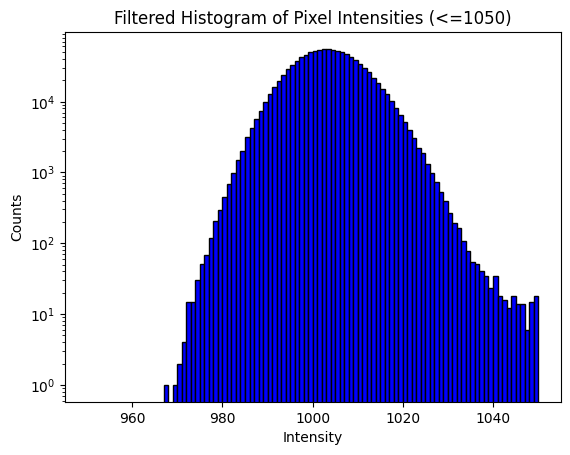

In [125]:
threshold=1050

filtered_data=flattened_data[flattened_data<=threshold]

plt.hist(filtered_data,bins=100,range=(950,1050),log=True,color='blue',edgecolor='black')
plt.title('Filtered Histogram of Pixel Intensities (<=1050)')
plt.xlabel('Intensity')
plt.ylabel('Counts')

In [126]:
num_cut_pixels=len(flattened_data)-len(filtered_data)

fraction_cut=(num_cut_pixels/len(flattened_data))*100

print(f'Number of pixels cut: {num_cut_pixels}')
print(f'Fraction of pixel cut: {fraction_cut}')

Number of pixels cut: 413
Fraction of pixel cut: 0.039386749267578125


In [127]:
mean_filtered=np.mean(filtered_data)
std_filtered=np.std(filtered_data)

print(f'Mean of the filtered data: {mean_filtered}')
print(f'Standard deviation of the filtered data:{std_filtered}')

Mean of the filtered data: 1002.9957325339666
Standard deviation of the filtered data:7.718023440399738


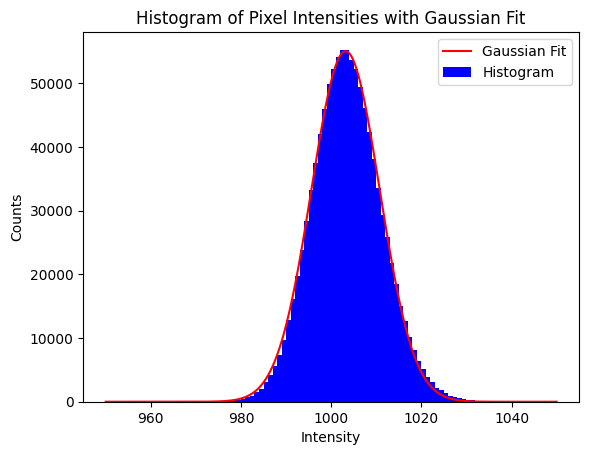

In [128]:
def plot_gaussian(data, range_values, mean, stddev, num_bins):
    """
    Plot a histogram of the pixel intensities with an overlaid Gaussian fit.
    
    :param data: The pixel intensity data to plot.
    :type data: np.ndarray
    :param range_values: The range for the histogram (min, max).
    :type range_values: tuple 
    :param mean: The mean of the Gaussian fit. 
    :type mean: float :unit: Analog Digital Unit (ADU)
    :param stddev: The standard deviation of the Gaussian fit. 
    :type stddev: float :unit: Analog Digital Unit (ADU)
    :param num_bins: The number of bins to use for the histogram.
    :type num_bins: int
    :return: Displays the plot with the histogram and Gaussian fit.
    :rtype: None
    """
    # Calculate histogram
    bin_heights, bin_borders = np.histogram(data, bins=num_bins, range=range_values)
    bin_widths = np.diff(bin_borders)
    bin_centers = bin_borders[:-1] + bin_widths / 2

    # Initialize Gaussian model
    gaussian = models.Gaussian1D(mean=mean, stddev=stddev)
    
    # Select fitting algorithm
    fitter = fitting.LevMarLSQFitter()
    
    # Fit the Gaussian model to the histogram data
    best_fit = fitter(gaussian, bin_centers, bin_heights)

    # Determine x-values for Gaussian fit
    x_interval_Gaussian = np.linspace(range_values[0], range_values[1], 10000)

    # Create the plot
    plt.figure()
    plt.bar(bin_centers, bin_heights, width=bin_widths, label='Histogram', log=False, color='blue')
    plt.plot(x_interval_Gaussian, best_fit(x_interval_Gaussian), label='Gaussian Fit', color='red')
    plt.xlabel('Intensity')
    plt.ylabel('Counts')
    plt.title('Histogram of Pixel Intensities with Gaussian Fit')
    plt.legend()
    plt.show()

# Example usage
plot_gaussian(data=filtered_data, range_values=(950, 1050), mean=np.mean(filtered_data), stddev=np.std(filtered_data), num_bins=100)

In [129]:
gain=2

actual_num_electrons=14.8

measured_num_electrons=gain*np.std(filtered_data)

difference=measured_num_electrons-actual_num_electrons
percentage_error= (difference/actual_num_electrons)*100

print(f'Measured number of electrons:{measured_num_electrons}e-')
print(f'Difference:{difference}e-')
print(f'Percentage error:{percentage_error}%')

Measured number of electrons:15.436046880799475e-
Difference:0.6360468807994746e-
Percentage error:4.297614059455909%
